In [17]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt

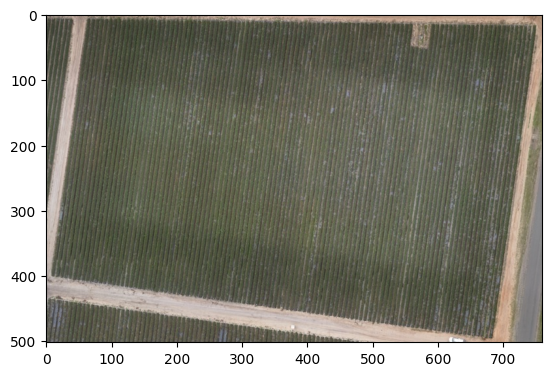

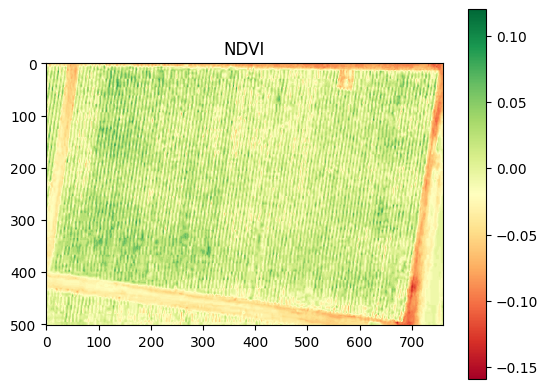

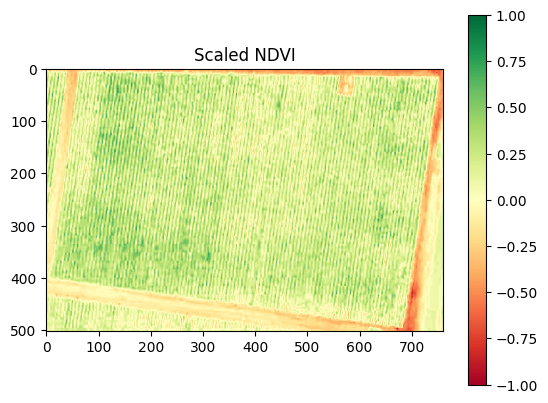

Maximum NDVI: 1.0
Minimum NDVI: -1.0


In [19]:
# read image, calculate NDVI, dsiplay in pyplot

# specify file path
input_file = "data1.jpg"

# open file using GDAL
ds = gdal.Open(input_file)

# RGB: read data from raster bands
red_band = ds.GetRasterBand(1).ReadAsArray().astype(np.uint8)
green_band = ds.GetRasterBand(2).ReadAsArray().astype(np.uint8)
blue_band = ds.GetRasterBand(3).ReadAsArray().astype(np.uint8)

# create RGB imgae
rgb_image = np.dstack((red_band, green_band, blue_band))

# NDVI: read data from raster bands
red_band = ds.GetRasterBand(1).ReadAsArray().astype(np.float32)
nir_band = ds.GetRasterBand(2).ReadAsArray().astype(np.float32)

# prevent zero division error
nir_band[nir_band == 0] = 1

# calculate NDVI
ndvi = (nir_band - red_band) / (nir_band + red_band)

# specify name of output file
output_rgb_file = "rgb_image.jpg"
output_ndvi_file = "ndvi_image.jpg"
output_scaled_ndvi_file = "scaled_ndvi_image.jpg"

plt.imshow(rgb_image)
plt.savefig(output_rgb_file)
plt.show()

plt.imshow(ndvi, cmap='RdYlGn')
plt.colorbar()
plt.title('NDVI')
plt.savefig(output_ndvi_file)
plt.show()

# normalize NDVI values between -1 to 1
desired_min = -1
desired_max = 1

# scale NDVI
scaled_ndvi = 2 * (ndvi - np.min(ndvi)) / (np.max(ndvi) - np.min(ndvi)) - 1

# show scaled NDVI
plt.imshow(scaled_ndvi, cmap='RdYlGn', vmin=desired_min, vmax=desired_max)
plt.colorbar()
plt.title('Scaled NDVI')
plt.savefig(output_scaled_ndvi_file)
plt.show()

# obtain maximum and minimum values from NDVI (-1, 1)
max_ndvi = np.max(scaled_ndvi)
min_ndvi = np.min(scaled_ndvi)

# print maximum and minimum values
print(f"Maximum NDVI: {max_ndvi}")
print(f"Minimum NDVI: {min_ndvi}")